Artifact 2 by Sameera Sultana. STudent ID: 2911507

## Bank Churn Prediction 

In [147]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV


In [88]:
df = pd.read_csv("BankCustomerData.csv")

# Exploratory Data Analysis

In [89]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [90]:
df.shape

(10000, 12)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [93]:
df.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [15]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "churn"]

categorical_variables

['country',
 'gender',
 'tenure',
 'products_number',
 'credit_card',
 'active_member']

In [16]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "customer_id"]
numeric_variables

['credit_score', 'age', 'balance', 'estimated_salary']

In [17]:
df["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [22]:
exit = df.loc[df["churn"]==1]
not_exit = df.loc[df["churn"]==0]

In [23]:
not_exit.shape
#exit.shape

(7963, 12)

In [43]:
def get_sorted_value_counts(df, column_name):
    return df[column_name].value_counts().sort_values()

print('Tenure frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "tenure"))
print(get_sorted_value_counts(exit, "tenure"))

print('Number of products frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "products_number"))
print(get_sorted_value_counts(exit, "products_number"))

print('credit card frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "credit_card"))
print(get_sorted_value_counts(exit, "credit_card"))

print('If active based frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "active_member"))
print(get_sorted_value_counts(exit, "active_member"))

print('country frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "country"))
print(get_sorted_value_counts(exit, "country"))

print('gender frequency of the churned and not churned groups')
print(get_sorted_value_counts(not_exit, "gender"))
print(get_sorted_value_counts(exit, "gender"))


Tenure frequency of the churned and not churned groups
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: tenure, dtype: int64
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: tenure, dtype: int64
Number of products frequency of the churned and not churned groups
3      46
1    3675
2    4242
Name: products_number, dtype: int64
4      60
3     220
2     348
1    1409
Name: products_number, dtype: int64
credit card frequency of the churned and not churned groups
0    2332
1    5631
Name: credit_card, dtype: int64
0     613
1    1424
Name: credit_card, dtype: int64
If active based frequency of the churned and not churned groups
0    3547
1    4416
Name: active_member, dtype: int64
1     735
0    1302
Name: active_member, dtype: int64
country frequency of the churned and not churned groups
Germany    1695
Spain      2064
France     4204
Name: country, dtype: 

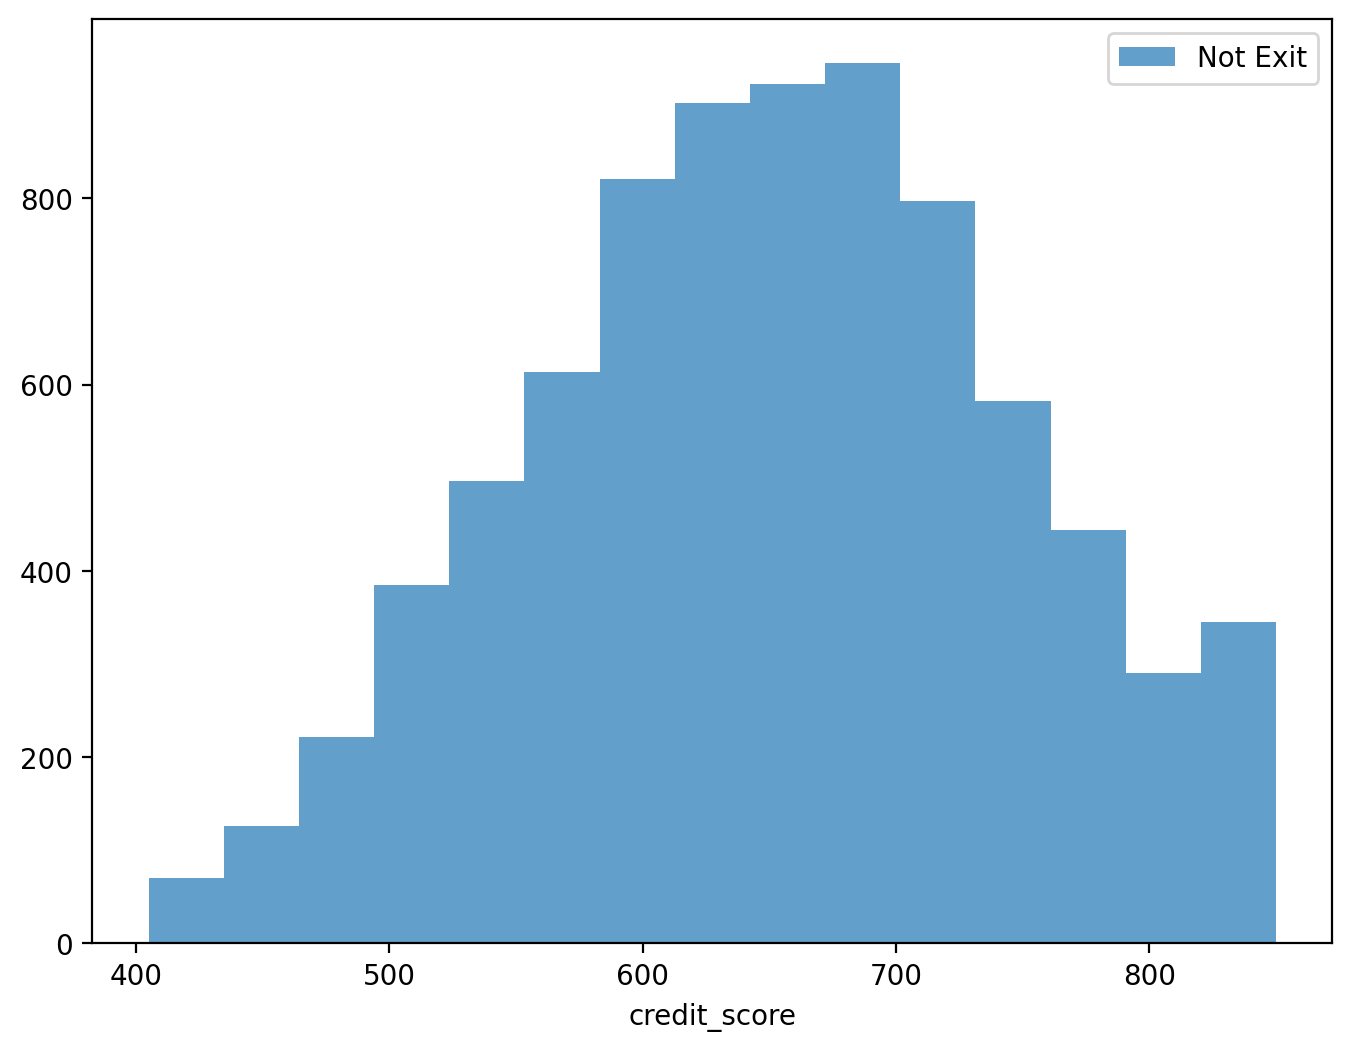

In [66]:
# distribution of the Credit Score for not_exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('credit_score')
pyplot.hist(not_churn["credit_score"],bins=15, alpha=0.7, label='Not Exit')
pyplot.legend(loc='upper right')
pyplot.show()

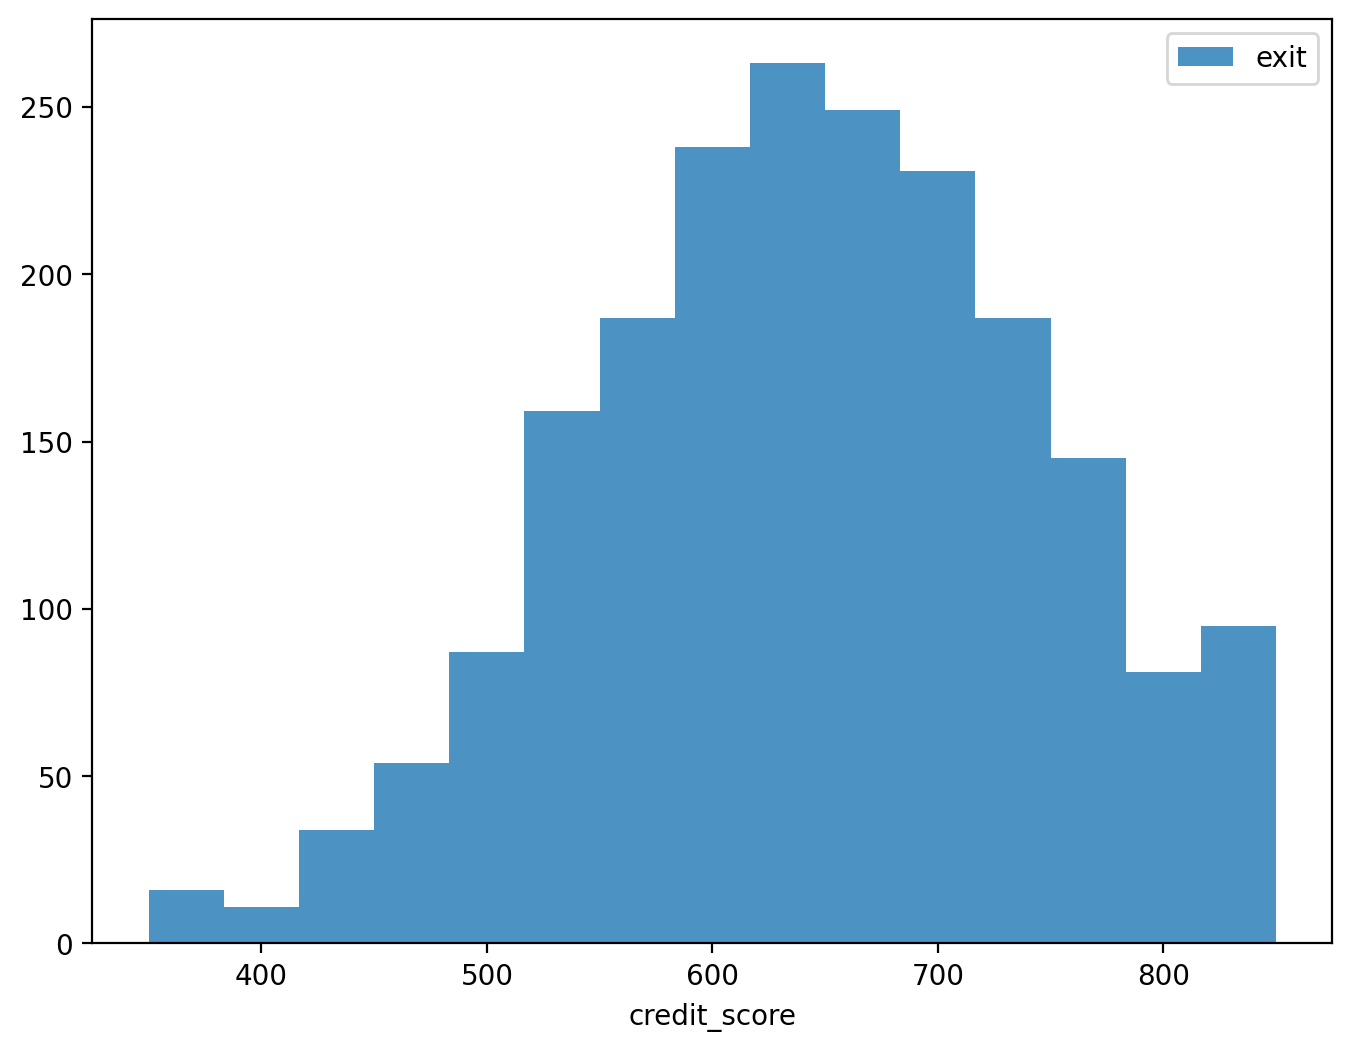

In [67]:
# distribution of the Credit Score for exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('credit_score')
pyplot.hist(churn["credit_score"],bins=15, alpha=0.8, label='exit')
pyplot.legend(loc='upper right')
pyplot.show()

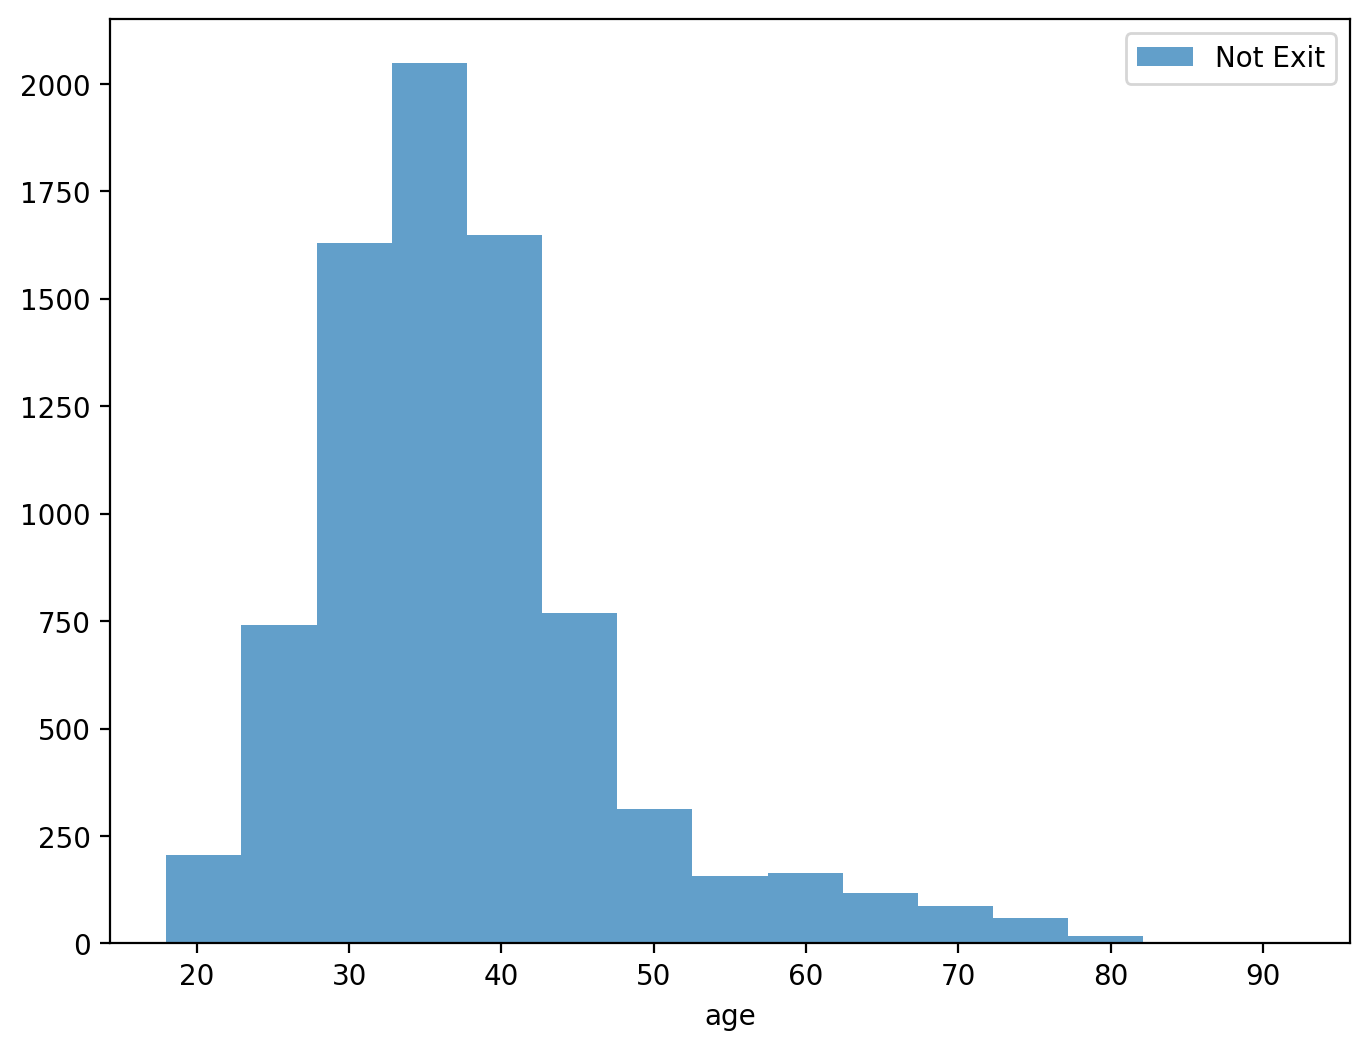

In [68]:
# distribution of the Age for not_exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('age')
pyplot.hist(not_churn["age"],bins=15, alpha=0.7, label='Not Exit')
pyplot.legend(loc='upper right')
pyplot.show()

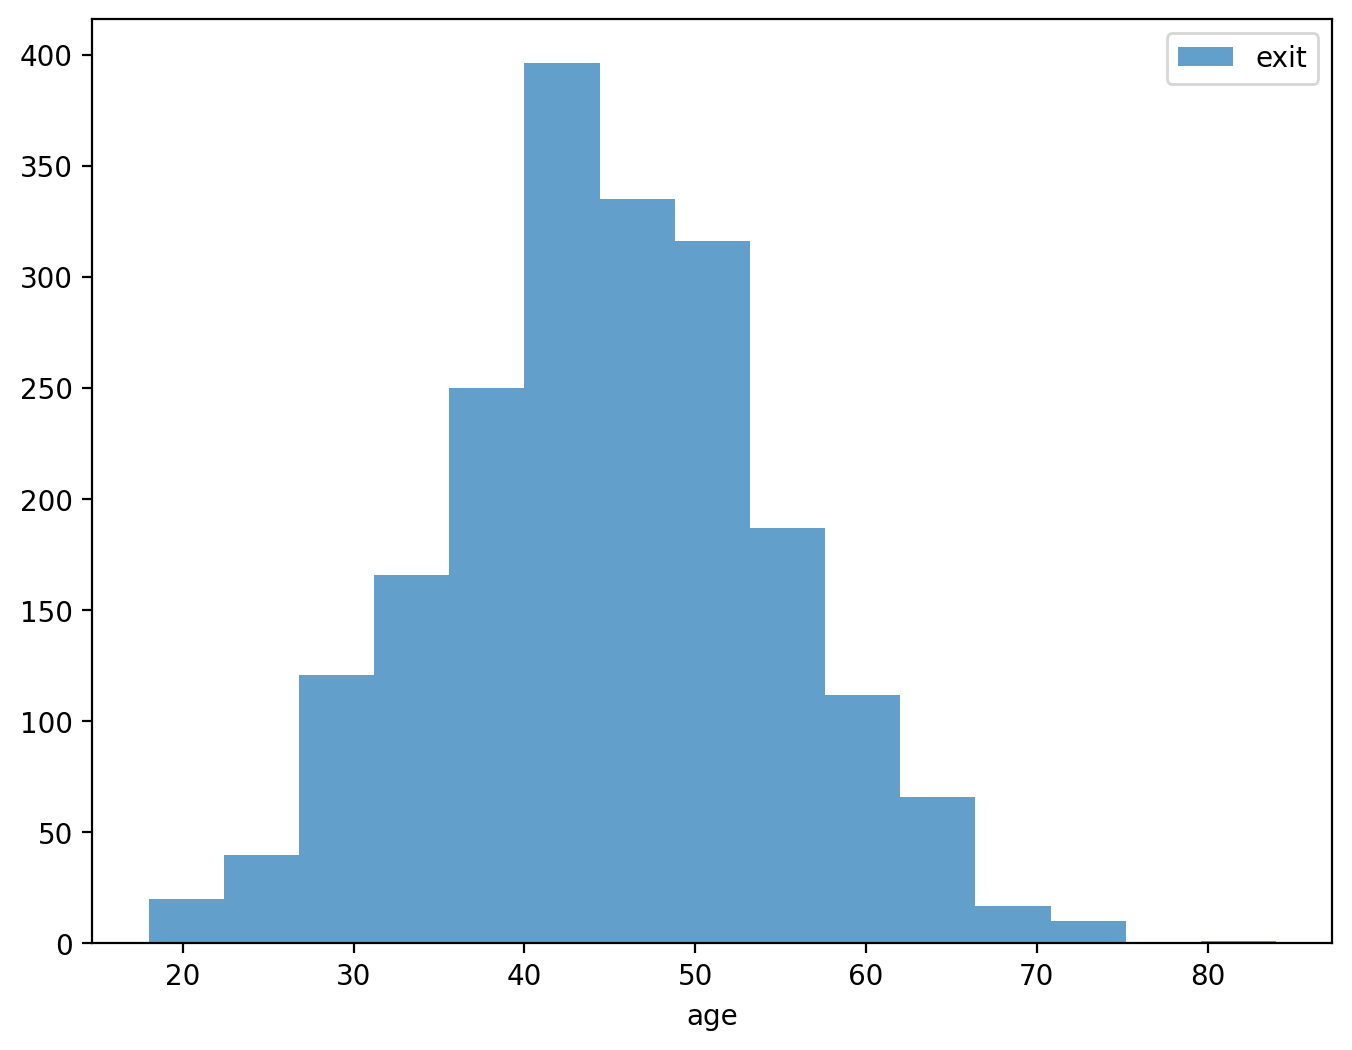

In [69]:
# distribution of the Age for exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('age')
pyplot.hist(churn["age"],bins=15, alpha=0.7, label='exit')
pyplot.legend(loc='upper right')
pyplot.show()

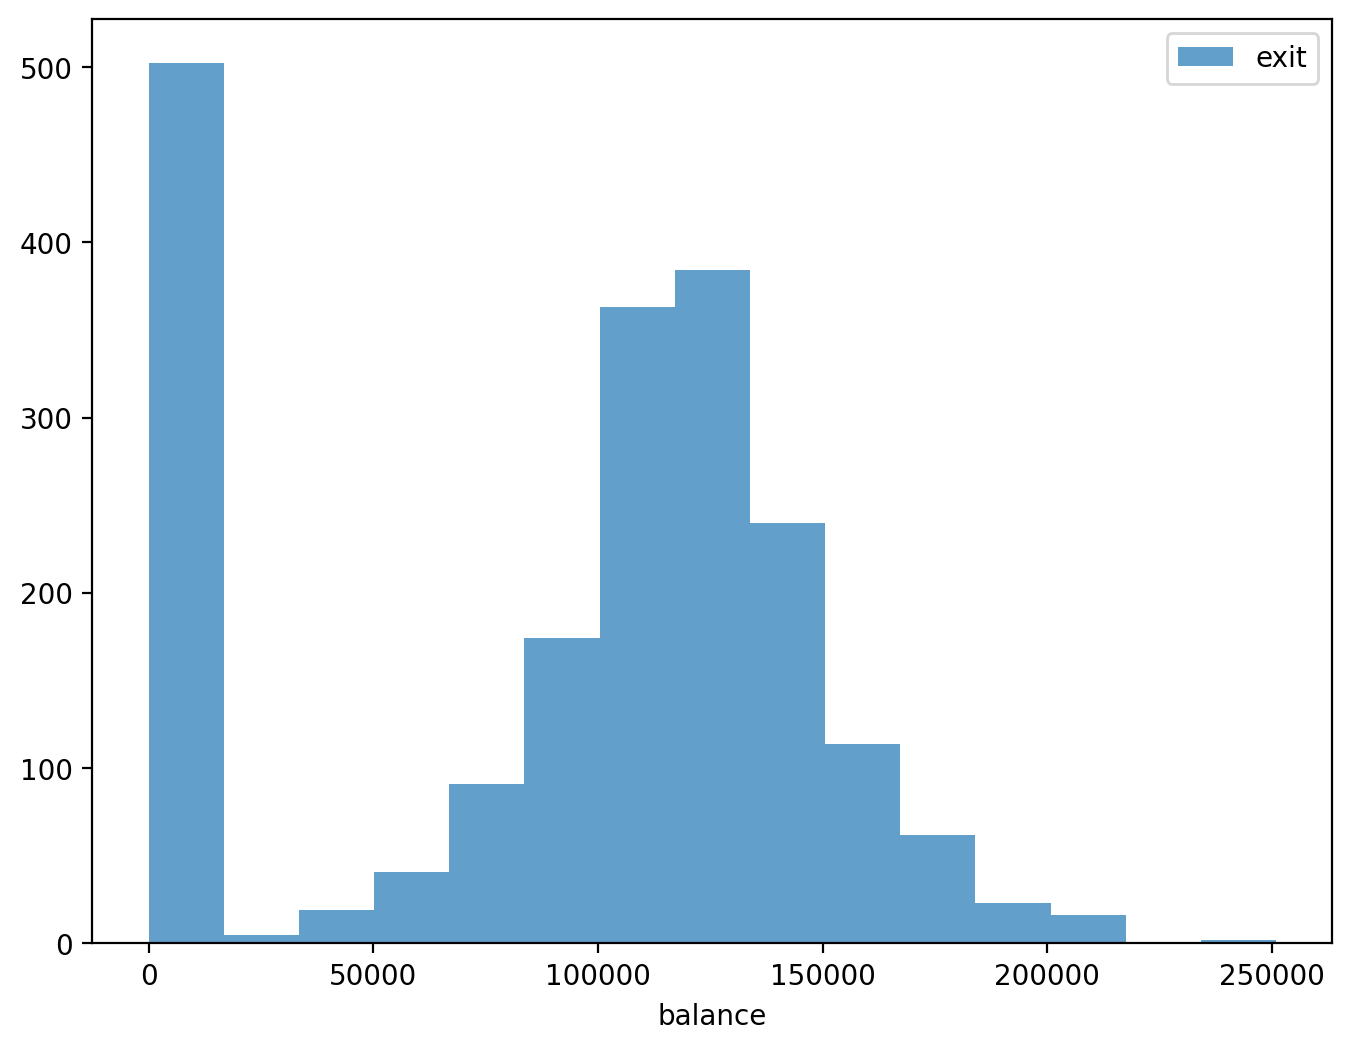

In [70]:
# distribution of the Balance for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('balance')
pyplot.hist(churn["balance"],bins=15, alpha=0.7, label='exit')
pyplot.legend(loc='upper right')
pyplot.show()

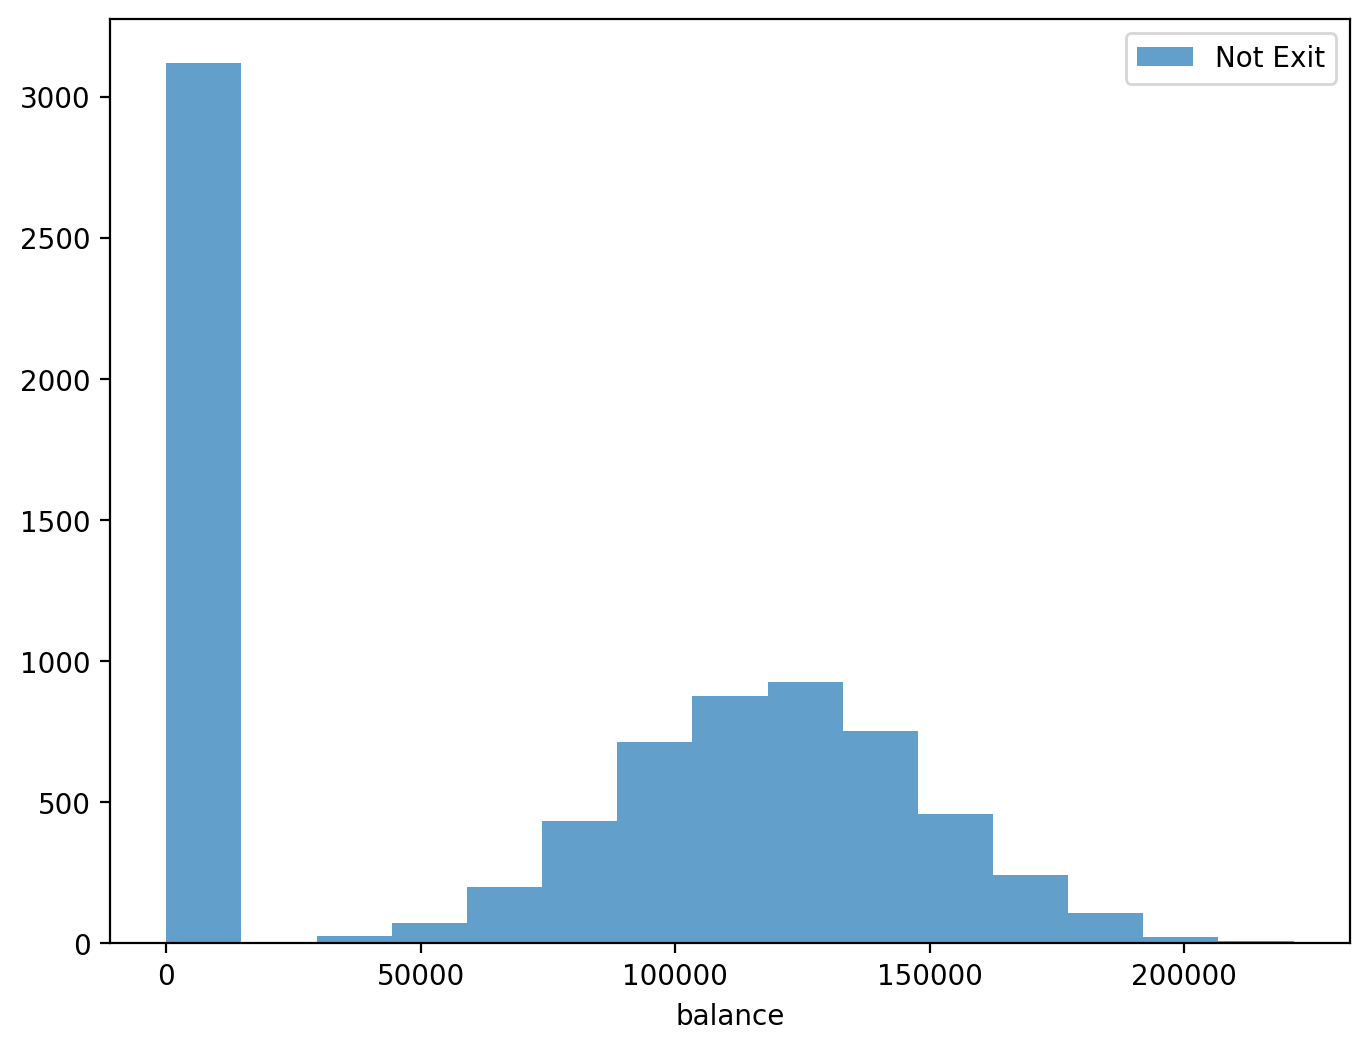

In [71]:
# distribution of the Balance for not_exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('balance')
pyplot.hist(not_churn["balance"],bins=15, alpha=0.7, label='Not Exit')
pyplot.legend(loc='upper right')
pyplot.show()

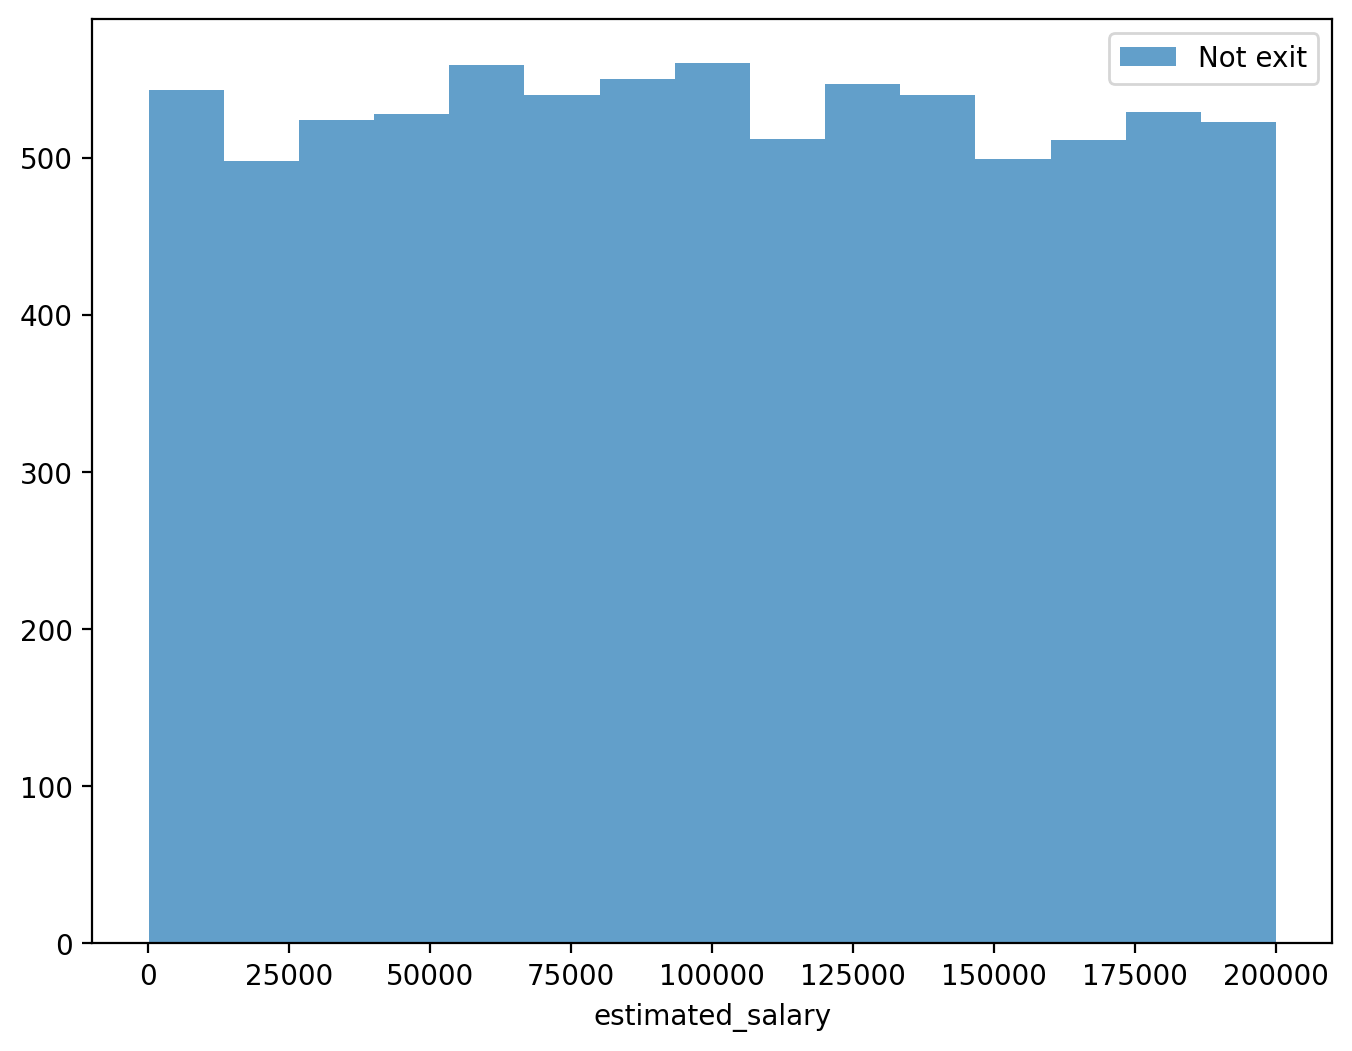

In [72]:
# distribution of the estimated_salary for exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('estimated_salary')
pyplot.hist(not_churn["estimated_salary"],bins=15, alpha=0.7, label='Not exit')
pyplot.legend(loc='upper right')
pyplot.show()

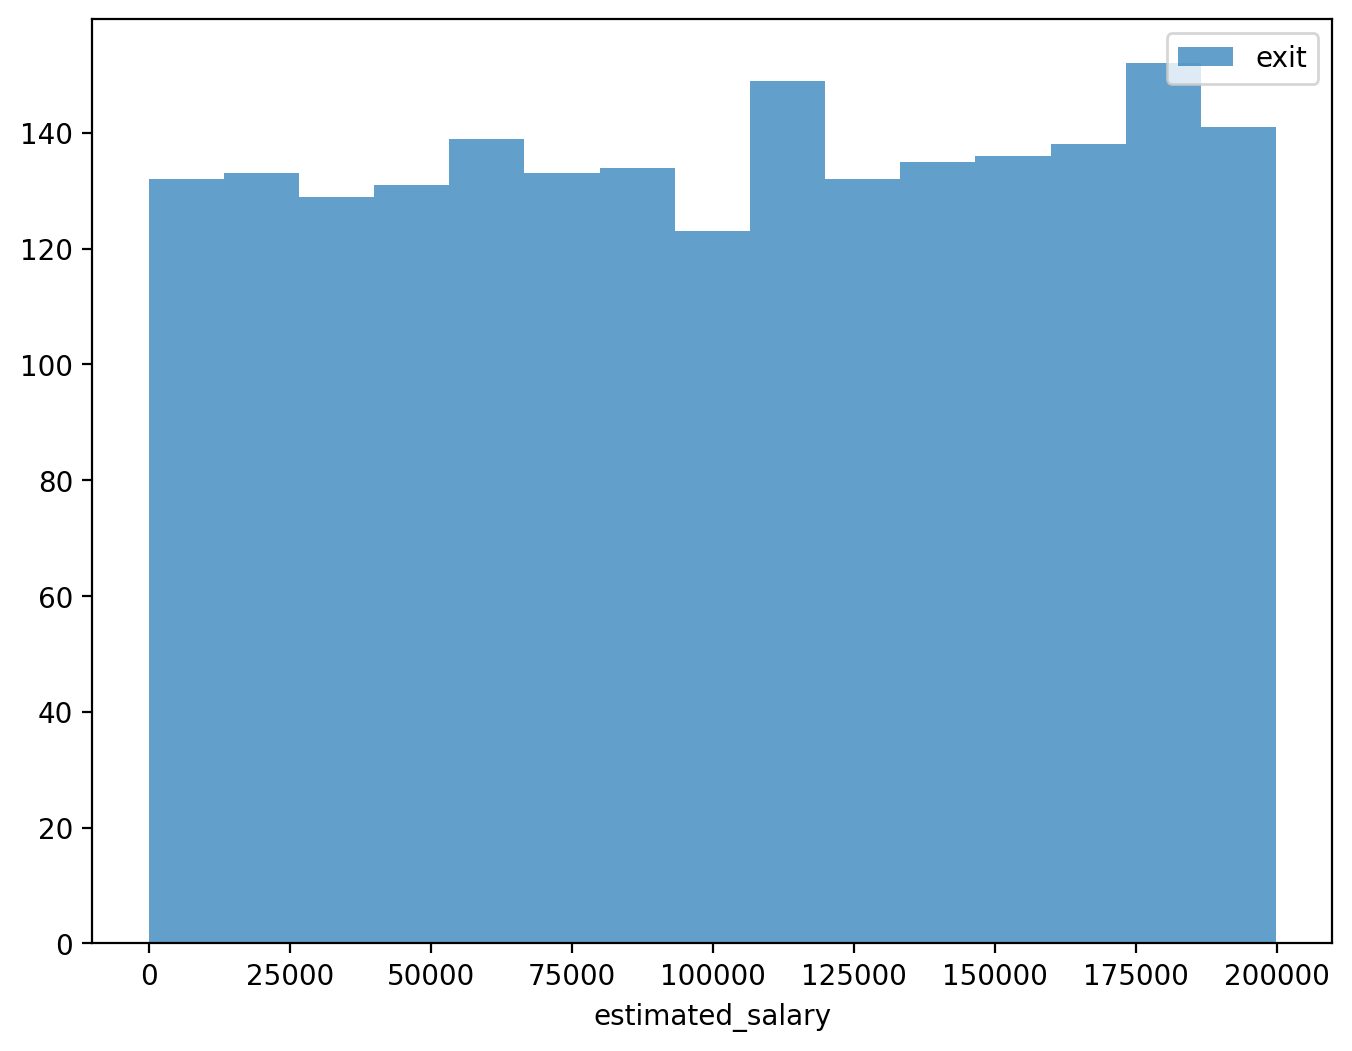

In [73]:
# distribution of the estimated_salary for exit
pyplot.figure(figsize=(8,6))
pyplot.xlabel('estimated_salary')
pyplot.hist(churn["estimated_salary"],bins=15, alpha=0.7, label='exit')
pyplot.legend(loc='upper right')
pyplot.show()

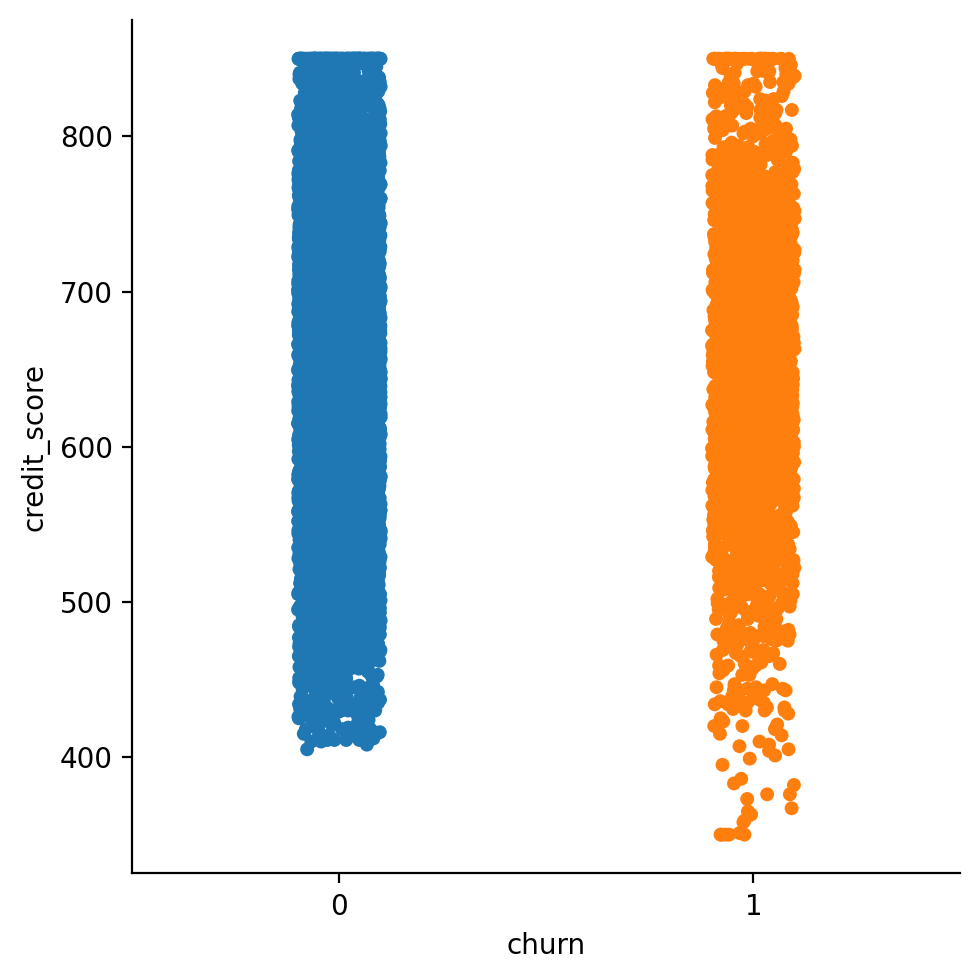

In [79]:
sns.catplot("churn", "credit_score", data = df)

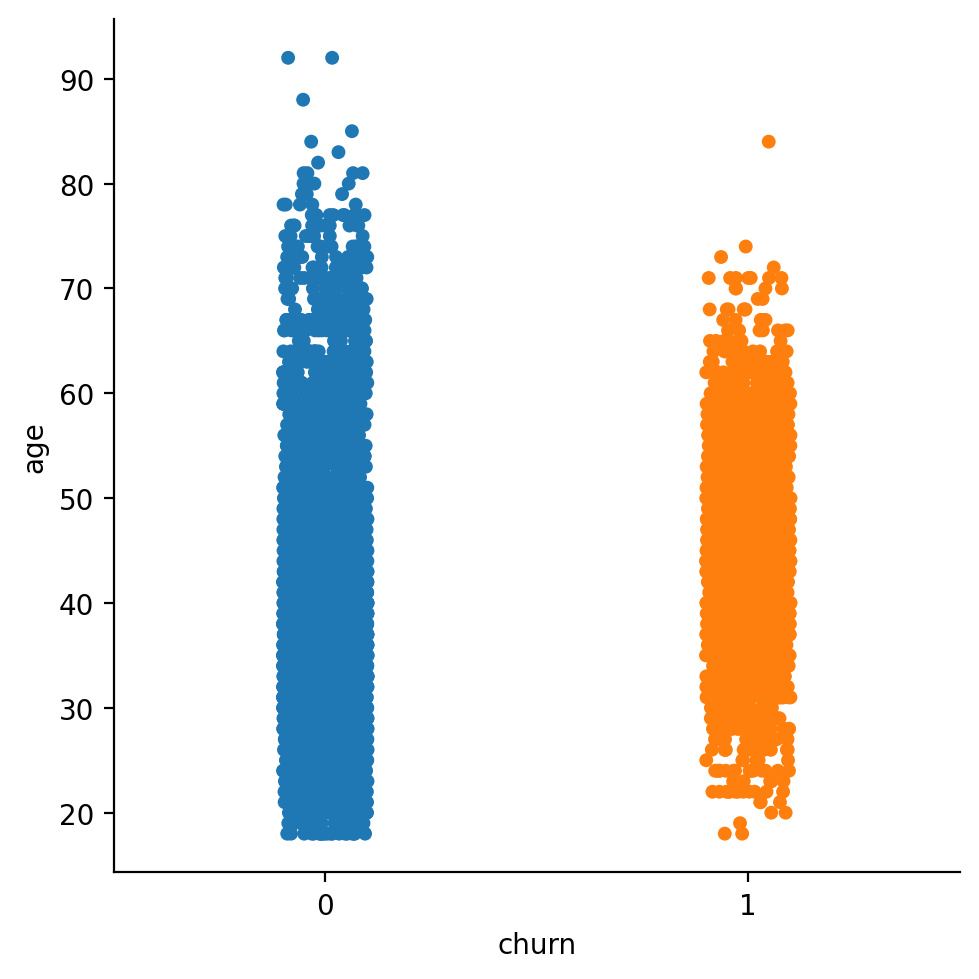

In [78]:
sns.catplot("churn", "age", data = df)

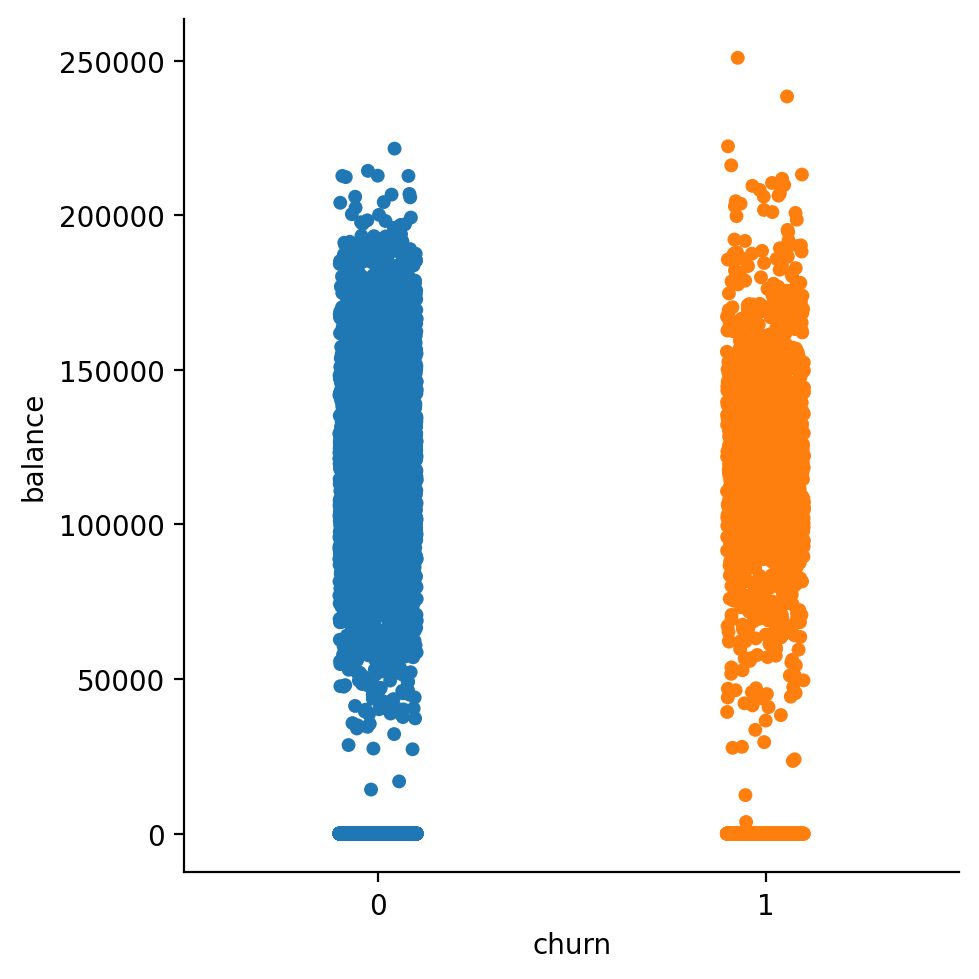

In [77]:
sns.catplot("churn", "balance", data = df)

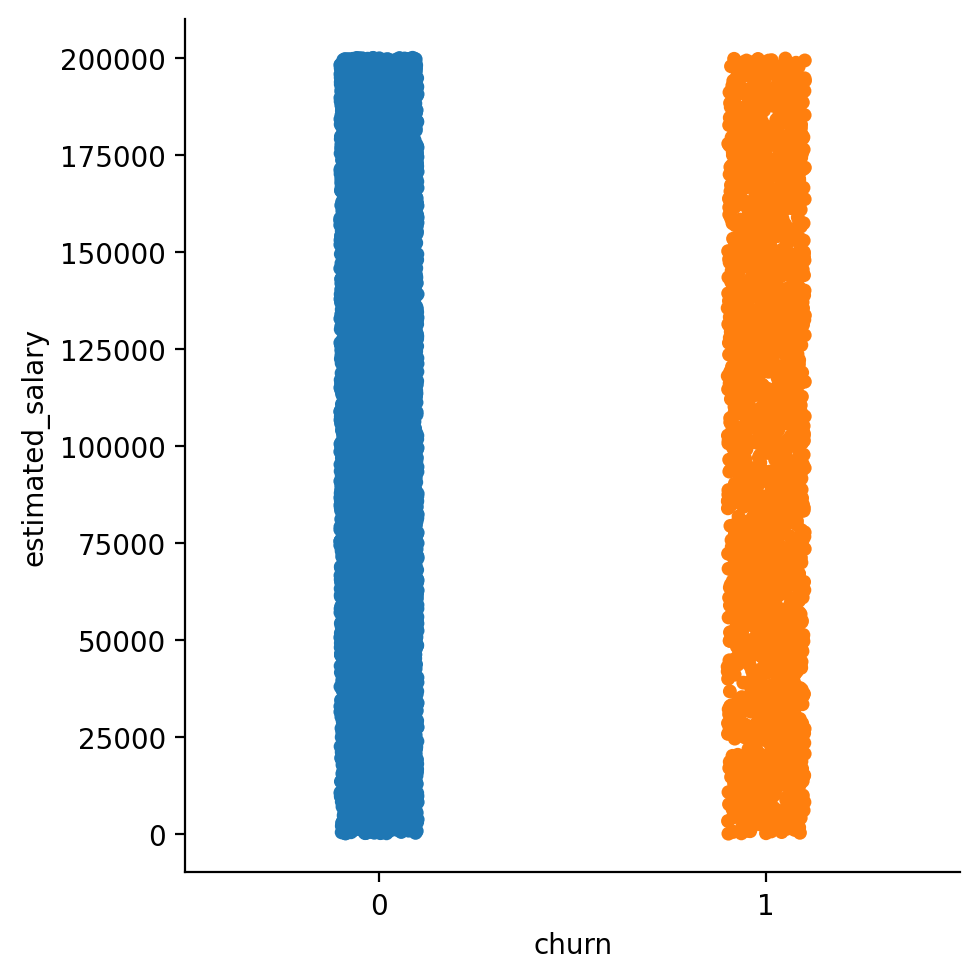

In [76]:
sns.catplot("churn", "estimated_salary", data = df)

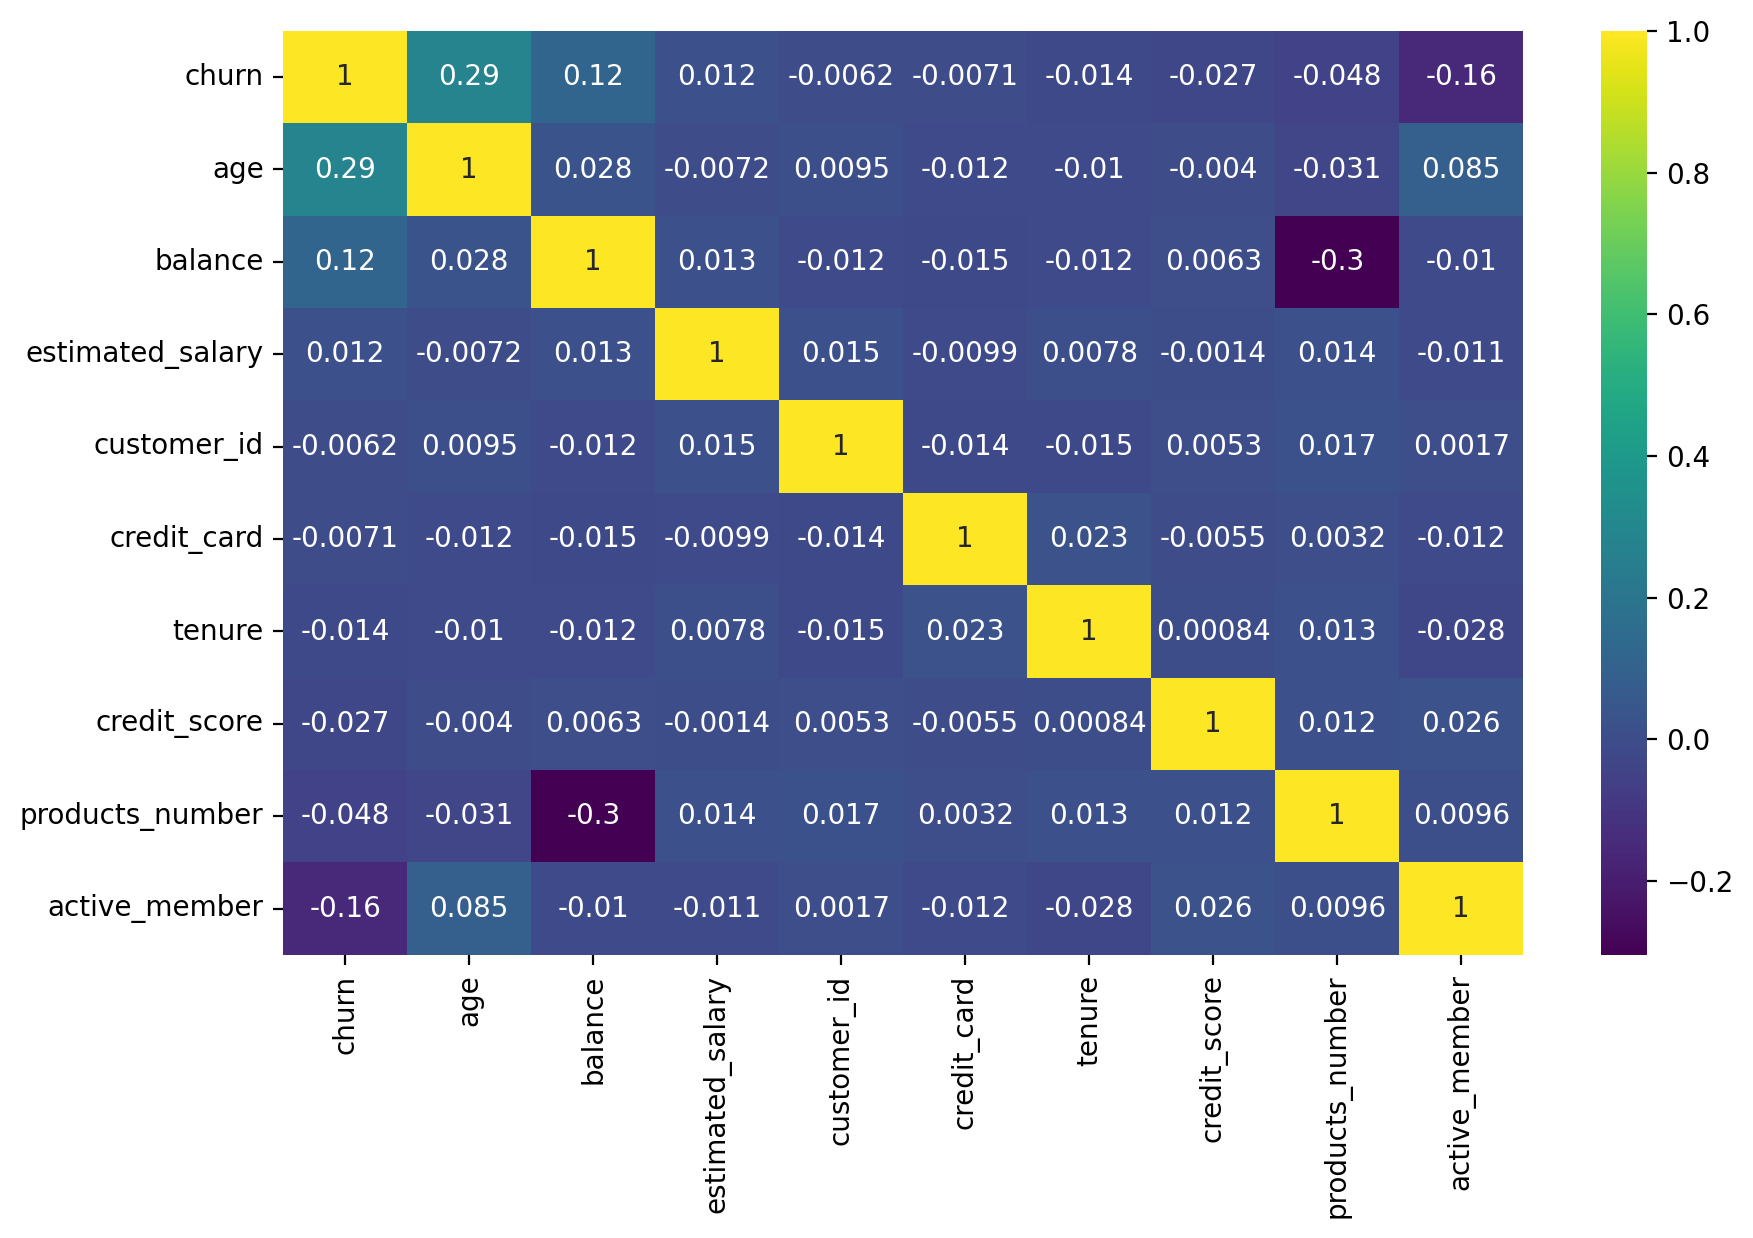

In [81]:
# churn correlation matrix
def plot_correlation_heatmap(df, k):
    cols = df.corr().nlargest(k, 'churn')['churn'].index
    cm = df[cols].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, cmap='viridis')


plot_correlation_heatmap(df, 10)

# Data Preprocessing

In [82]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There are no missing values in this dataset

In [85]:
for var in numeric_variables:
    low_quantile = 0.05
    up_quantile = 0.95
    for col in [var]:
        quantile_one = df[col].quantile(low_quantile)
        quantile_three = df[col].quantile(up_quantile)
        interquantile_range = quantile_three - quantile_one
        up_limit = quantile_three + 1.5 * interquantile_range
        low_limit = quantile_one - 1.5 * interquantile_range
        
        outliers = (df[col] > up_limit) | (df[col] < low_limit)
        number_of_outliers = outliers.sum()
        if number_of_outliers > 0:
            print(col, ":", number_of_outliers, "outliers")
        else:
            print('No outliers')
     
    

No outliers
No outliers
No outliers
No outliers


There are no outliers in this dataset

In [94]:
# Variables to apply one hot encoding
list = ["gender", "country"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [95]:
df.head()

customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  gender_Male  \
0            1              1         101348.88      1            0   
1            0              1         112542.58      0            0   
2            1              0         113931.57      1            0   
3            0              0          93826.63      0            0   
4            1              1          79084.10      0            0   

   country_Germany  country_Spain  
0                0              0  
1                0              1  
2                0              0  
3                0              0  
4                0              1

# Scalling

In [96]:
df = df.drop(["customer_id"], axis = 1)

In [97]:
df

credit_score  age  tenure    balance  products_number  credit_card  \
0              619   42       2       0.00                1            1   
1              608   41       1   83807.86                1            0   
2              502   42       8  159660.80                3            1   
3              699   39       1       0.00                2            0   
4              850   43       2  125510.82                1            1   
5              645   44       8  113755.78                2            1   
6              822   50       7       0.00                2            1   
7              376   29       4  115046.74                4            1   
8              501   44       4  142051.07                2            0   
9              684   27       2  134603.88                1            1   
10             528   31       6  102016.72                2            0   
11             497   24       3       0.00                2            1   
12             476   34      10       0.00                2            1   
13             549   25       5       0.00                2            0   
14             635   35       7       0.00                2            1   
15             616   45       3  143129.41                2            0   
16             653   58       1  132602.88                1            1   
17             549   24       9       0.00                2            1   
18             587   45       6       0.00                1            0   
19             726   24       6       0.00                2            1   
20             732   41       8       0.00                2            1   
21             636   32       8       0.00                2            1   
22             510   38       4       0.00                1            1   
23             669   46       3       0.00                2            0   
24             846   38       5       0.00                1            1   
25             577   25       3       0.00                2            0   
26             756   36       2  136815.64                1            1   
27             571   44       9       0.00                2            0   
28             574   43       3  141349.43                1            1   
29             411   29       0   59697.17                2            1   
30             591   39       3       0.00                3            1   
31             533   36       7   85311.70                1            0   
32             553   41       9  110112.54                2            0   
33             520   42       6       0.00                2            1   
34             722   29       9       0.00                2            1   
35             475   45       0  134264.04                1            1   
36             490   31       3  145260.23                1            0   
37             804   33       7   76548.60                1            0   
38             850   36       7       0.00                1            1   
39             582   41       6   70349.48                2            0   
40             472   40       4       0.00                1            1   
41             465   51       8  122522.32                1            0   
42             556   61       2  117419.35                1            1   
43             834   49       2  131394.56                1            0   
44             660   61       5  155931.11                1            1   
45             776   32       4  109421.13                2            1   
46             829   27       9  112045.67                1            1   
47             637   39       9  137843.80                1            1   
48             550   38       2  103391.38                1            0   
49             776   37       2  103769.22                2            1   
50             698   44      10  116363.37                2            1   
51             585   36       5  146050.97            

In [102]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)

# Modeling

In [103]:
X = df.drop("churn",axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [107]:
models = [('LR', LogisticRegression(random_state=42)),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier(random_state=42)),
          ('RF', RandomForestClassifier(random_state=42)),
          ('SVR', SVC(gamma='auto',random_state=42)),
          ('GB', GradientBoostingClassifier(random_state = 42)),
          ("LightGBM", LGBMClassifier(random_state=42))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    output = "%s: %f " % (name, cv_results.mean())
    print(output)

LR: 0.789800 
KNN: 0.765000 
DT: 0.790100 
RF: 0.861300 
SVR: 0.796300 
GB: 0.864500 
LightGBM: 0.862100 


In [126]:
def classifier_results(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,zero_division=0)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("Accuracy: {:.4f} Precision: {:.4f} Recall: {:.4f} F1: {:.4f} ROC-AUC: {:.4f}".format(accuracy,precision,recall,f1,roc_auc))
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(confusion, cmap = 'YlGnBu',annot = True, fmt='d')
    ax.set_title('Confusion Matrix')
       
    return confusion

In [129]:
def generate_auc_roc_curve(y_test,  y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

Accuracy: 0.8675 Precision: 0.7500 Recall: 0.4885 F1: 0.5917 ROC-AUC: 0.8729


array([[1543,   64],
       [ 201,  192]], dtype=int64)

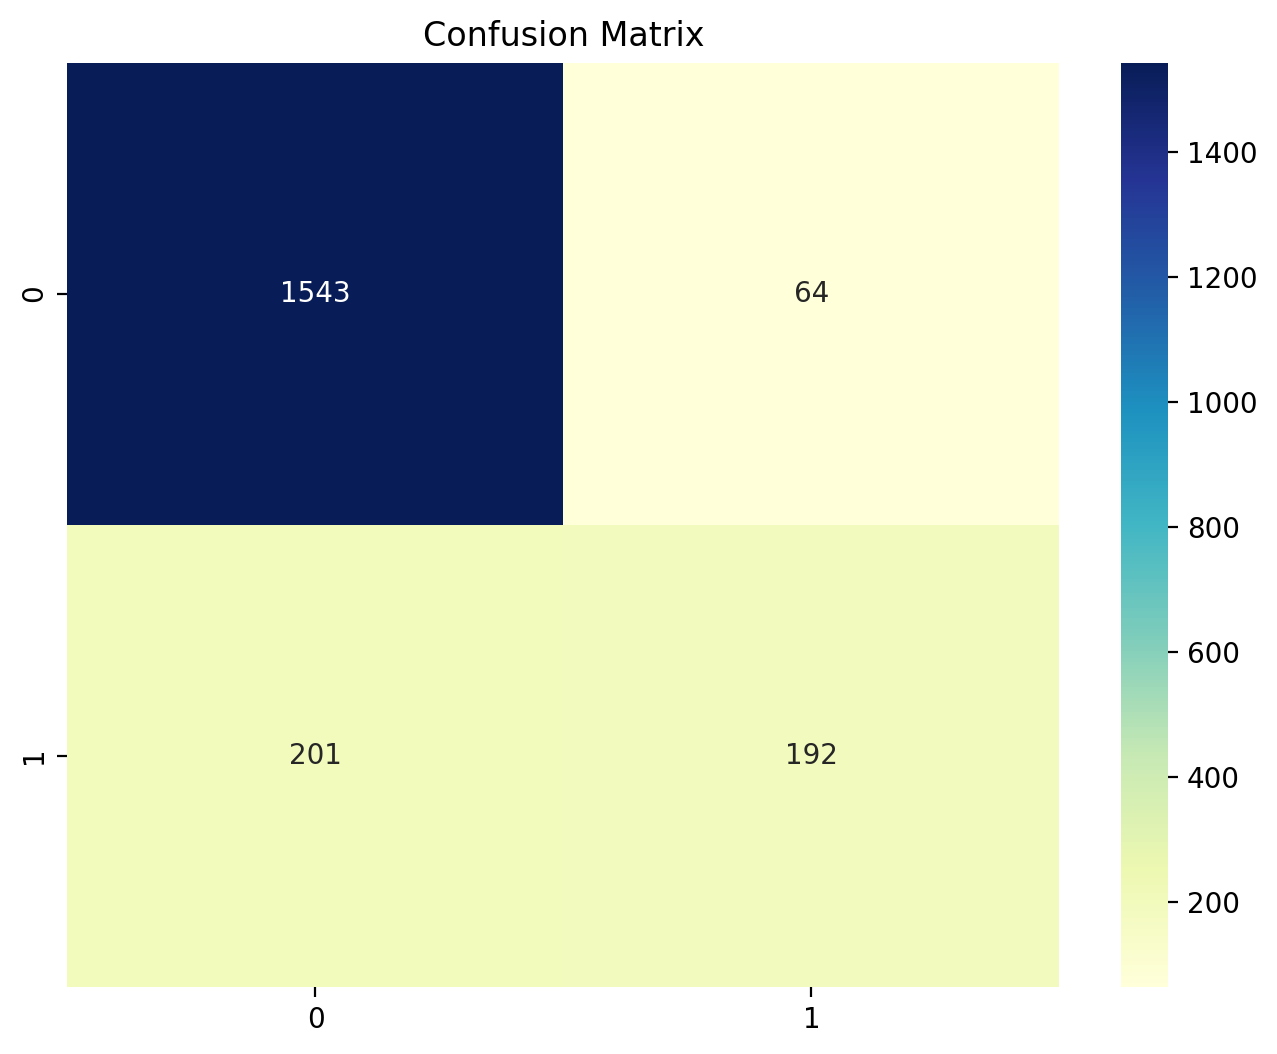

In [128]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  
classifier_results(y_test, pred=y_pred, pred_proba=y_pred_proba)


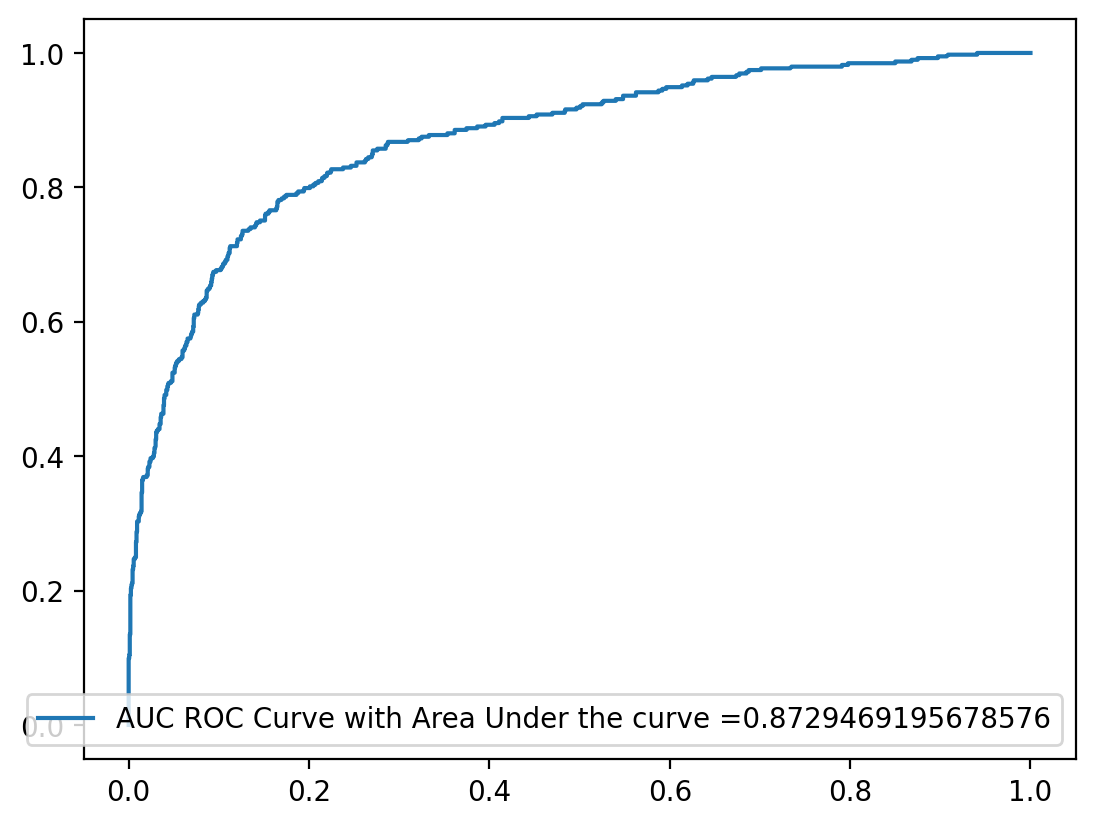

In [130]:
generate_auc_roc_curve(y_test,  y_pred_proba)

# Hyperparameter Tuning

In [137]:
def grid_search_cv(estimator, param_grid, cv=5, scoring='roc_auc'):
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

Lets tune the LGBMClassifier,GradientBoostingClassifier and RandomForestClassifier

In [138]:
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}


In [139]:
lgbm = LGBMClassifier(random_state=42)
lgbm_best_params = grid_search_cv(lgbm, lgbm_param_grid)
print("Best parameters for LGBMClassifier:", lgbm_best_params)


Best parameters for LGBMClassifier: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [141]:
gb = GradientBoostingClassifier(random_state=42)
gb_best_params = grid_search_cv(gb, gb_param_grid)
print("Best parameters for GradientBoostingClassifier:", gb_best_params)

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [144]:
rf = RandomForestClassifier(random_state=42)
rf_best_params = grid_search_cv(rf, rf_param_grid)
print("Best parameters for RandomForestClassifier:", rf_best_params)

Best parameters for RandomForestClassifier: {'max_depth': 7, 'n_estimators': 200}


Accuracy: 0.8670 Precision: 0.7571 Recall: 0.4758 F1: 0.5844 ROC-AUC: 0.8741


array([[1547,   60],
       [ 206,  187]], dtype=int64)

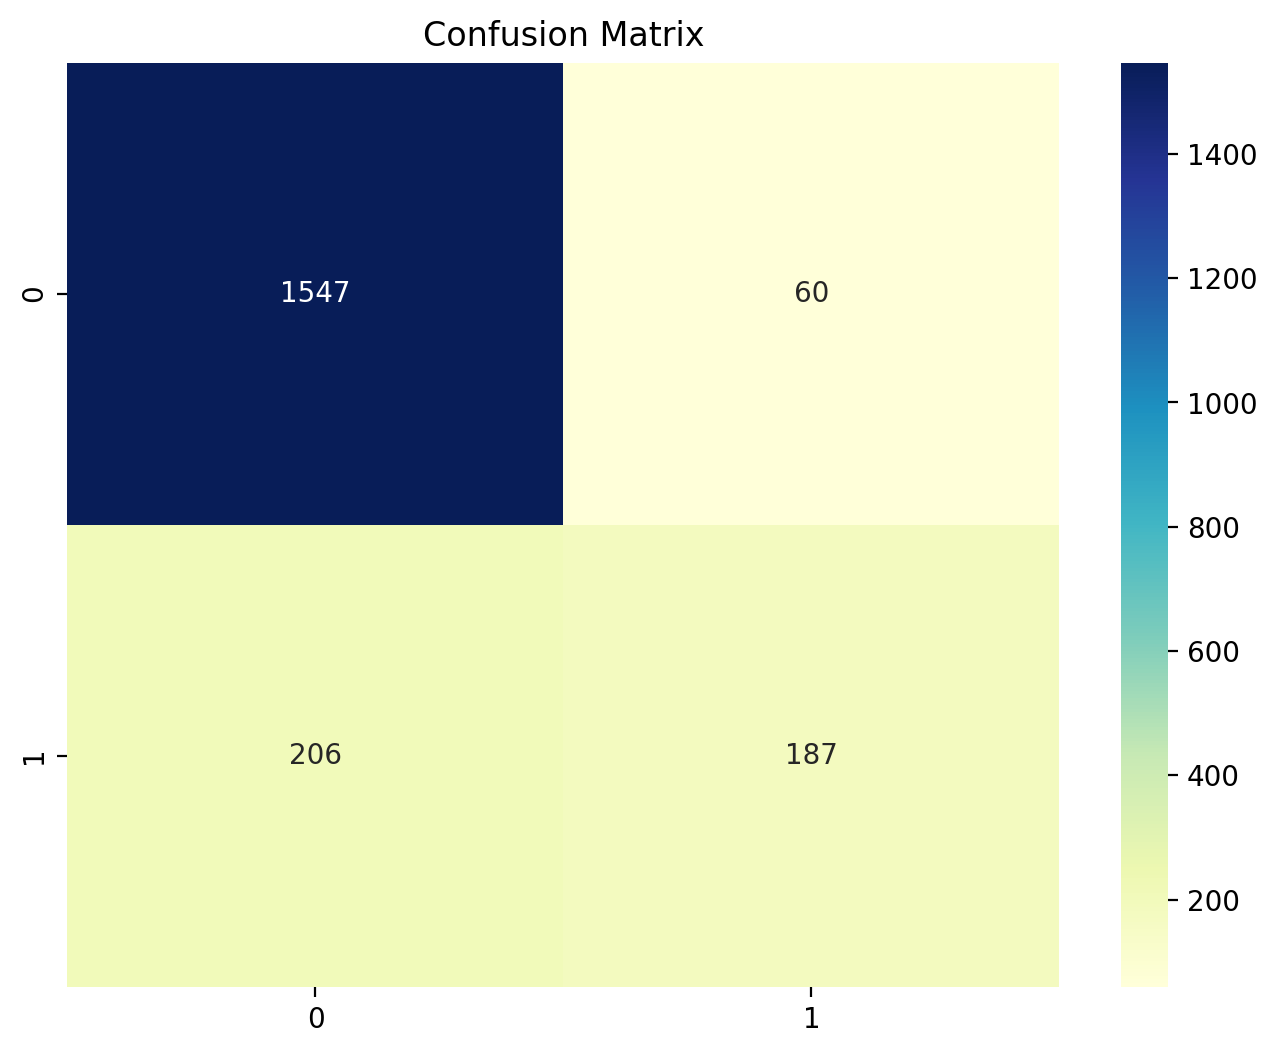

In [142]:
model1 = LGBMClassifier(learning_rate= 0.05, max_depth= 5, n_estimators= 100,random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred_proba = model1.predict_proba(X_test)[:, 1]  
classifier_results(y_test, pred=y_pred, pred_proba=y_pred_proba)


Accuracy: 0.8675 Precision: 0.7520 Recall: 0.4860 F1: 0.5904 ROC-AUC: 0.8731


array([[1544,   63],
       [ 202,  191]], dtype=int64)

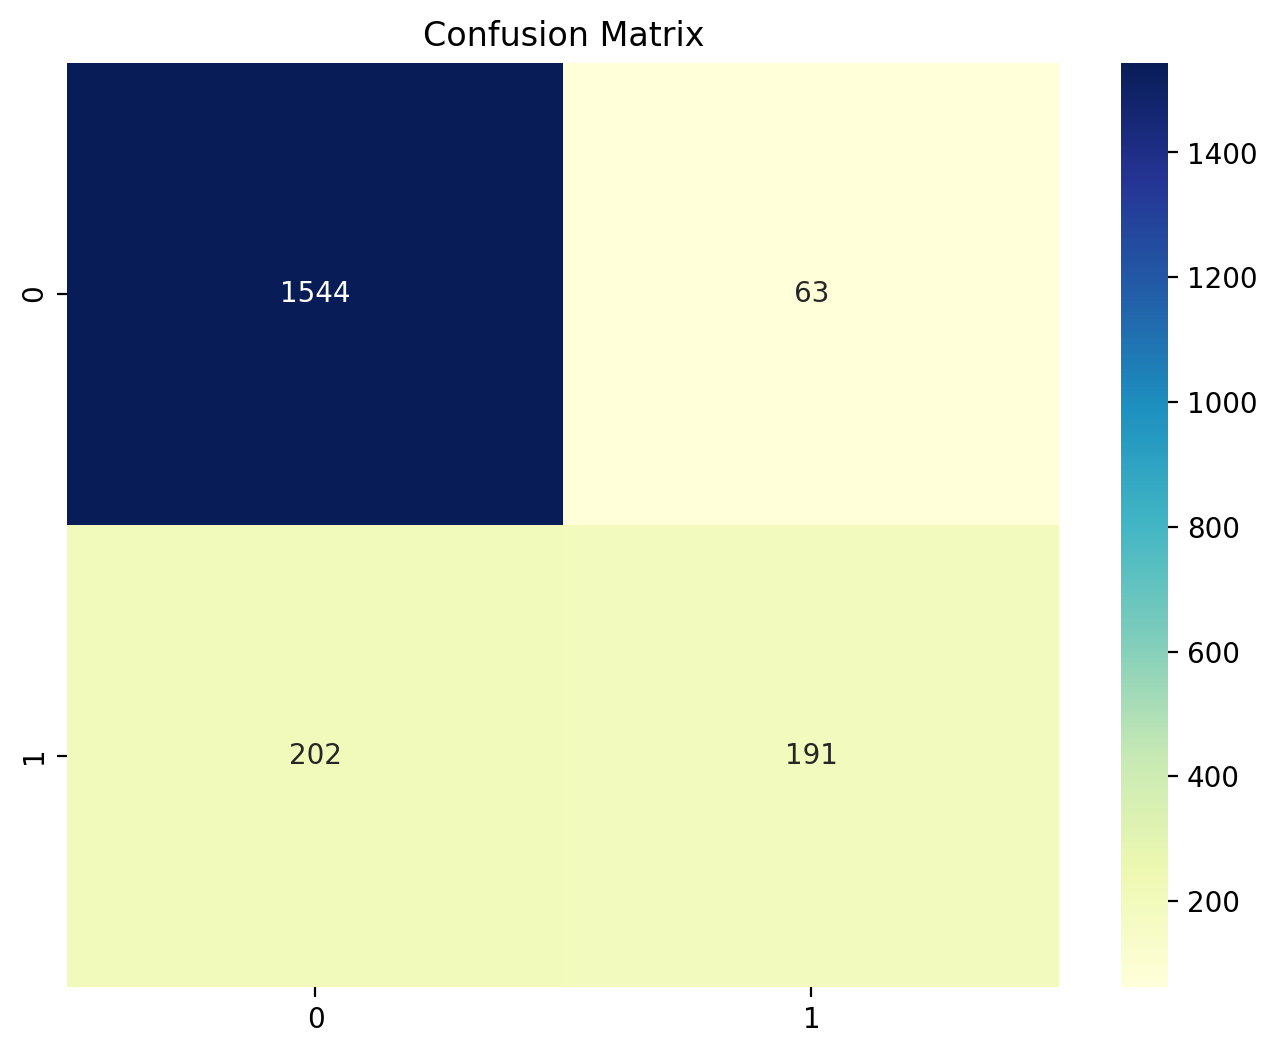

In [143]:
model2 = GradientBoostingClassifier(learning_rate= 0.05, max_depth= 3, n_estimators= 200,random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred_proba = model2.predict_proba(X_test)[:, 1]  
classifier_results(y_test, pred=y_pred, pred_proba=y_pred_proba)


Accuracy: 0.8605 Precision: 0.7938 Recall: 0.3919 F1: 0.5247 ROC-AUC: 0.8685


array([[1567,   40],
       [ 239,  154]], dtype=int64)

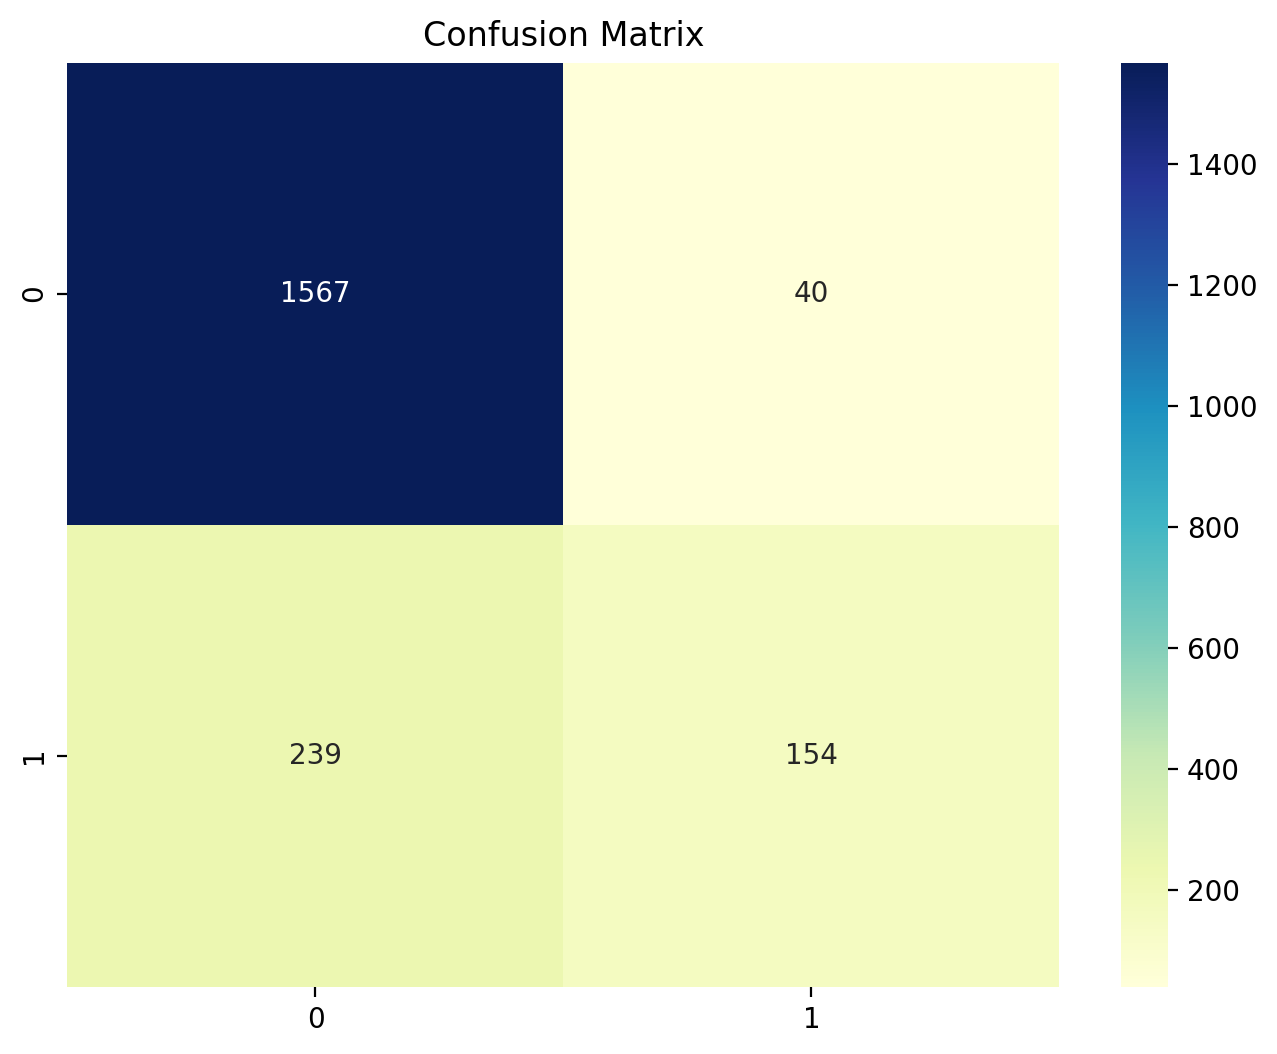

In [146]:
model3 = RandomForestClassifier(max_depth= 7, n_estimators= 200,random_state=42)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred_proba = model3.predict_proba(X_test)[:, 1]  
classifier_results(y_test, pred=y_pred, pred_proba=y_pred_proba)


# Conclusion

The Best model is LGBMClassifier model with a learning rate of 0.05, max depth of 5, and 100 estimators achieved an accuracy of 0.8670. It showed a precision of 0.7571, recall of 0.4758, and an F1 score of 0.5844. The model's ROC-AUC score was 0.8741, indicating good performance in distinguishing between positive and negative cases. Overall, the model demonstrated promising results, although further improvements can be made. Trialing wiht ensembles may result in better results